In [1]:
library(MASS)

The `MASS` library contains the `Boston` data set, which records `medv` (median house value) for 506 neighborhoods around Boston.

We will seek to predict `medv` using 13 predictors such as `rm` (average number of rooms per house), `age` (average age of houses, and `lstat` (percent of households with low socioeconomic status.

In [4]:
fix(Boston)
names(Boston)

[1] "crim"    "zn"      "indus"   "chas"    "nox"     "rm"      "age"    
 [8] "dis"     "rad"     "tax"     "ptratio" "black"   "lstat"   "medv"

To find out more about the data set we can type `?Boston`.

We will start by using the `lm()` function to fit a simple linear regression model, with `medv` as the resonse and `lstat` as the predictor.

The basic syntax is `lm(y~x, data)` where y is the response and x is the predictor and data is the data set in which these two variables are kept.

In [5]:
lm.fit = lm(medv~lstat, data=Boston)

In [6]:
# attach makes variables from Boston available by variable name
attach(Boston)
lm.fit = lm(medv~lstat)

In [10]:
lm.fit


Call:
lm(formula = medv ~ lstat)

Coefficients:
(Intercept)        lstat  
      34.55        -0.95  


If we call `summary(lm.fit)` we get p-values and standard erros for the coefficients as well as the R<sup>2</sup> statistic and F-statistic for the model

In [11]:
summary(lm.fit)


Call:
lm(formula = medv ~ lstat)

Residuals:
    Min      1Q  Median      3Q     Max 
-15.168  -3.990  -1.318   2.034  24.500 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 34.55384    0.56263   61.41   <2e-16 ***
lstat       -0.95005    0.03873  -24.53   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.216 on 504 degrees of freedom
Multiple R-squared:  0.5441,	Adjusted R-squared:  0.5432 
F-statistic: 601.6 on 1 and 504 DF,  p-value: < 2.2e-16


We cna use the `names()` function in order to find out what other pieces of information are stored in `lm.fit`.

Although we can extact these quantities by name e.g. `lm.fit\$coefficients`, it is safe to use the extractor functions like `coef()` to access them.

In [12]:
names(lm.fit)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"

In [13]:
coef(lm.fit)

(Intercept)       lstat 
 34.5538409  -0.9500494

In order to obtain confidence intervals for the coefficient estimates, we can use the `confint()` command.

In [14]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),33.448457,35.6592247
lstat,-1.026148,-0.8739505


The `predict()` function can be used to produce confidence intervales for the prediction of `medv` for a given value of `lstat`

In [16]:
predict(lm.fit, data.frame(lstat=c(5, 10, 15)))

1        2        3 
29.80359 25.05335 20.30310

In [17]:
predict(lm.fit, data.frame(lstat=c(5, 10, 15)), interval="confidence")

,fit,lwr,upr
1,29.80359,29.00741,30.59978
2,25.05335,24.47413,25.63256
3,20.30310,19.73159,20.87461


A confidence interval takes into account the the standard error, which is the uncertainty due to sampling.

A prediction interval also takes this into account but also takes into account the variability caused byt he irreducible error. The prediction interval will always be greater than the confidence interval

In [18]:
predict(lm.fit, data.frame(lstat=c(5, 10, 15)), interval="prediction")

,fit,lwr,upr
1,29.80359,17.565675,42.04151
2,25.05335,12.827626,37.27907
3,20.30310,8.077742,32.52846


We will now plot `medv` and `lstat`, along with the least squares regression line using the `plot()` and `abline()` functions.

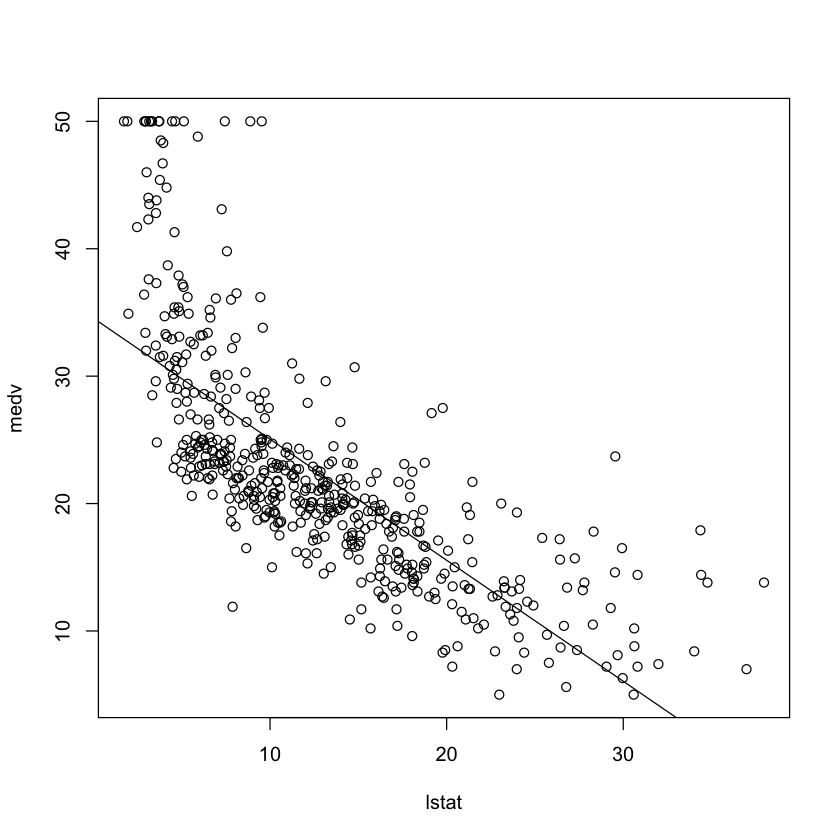

In [19]:
plot(lstat, medv)
abline(lm.fit)

The `abline()` function can be used to draw any line, not just the least squares regression line. To draw a line with intercept `a` and slope `b`, we type `abline(a, b)`.

The `lwd=3` command causes the width of the regression line to be increased by a factor of 3. This works for the `plot()` and `lines()` functions also. We can also use the `pch` option to create different plotting symbols.

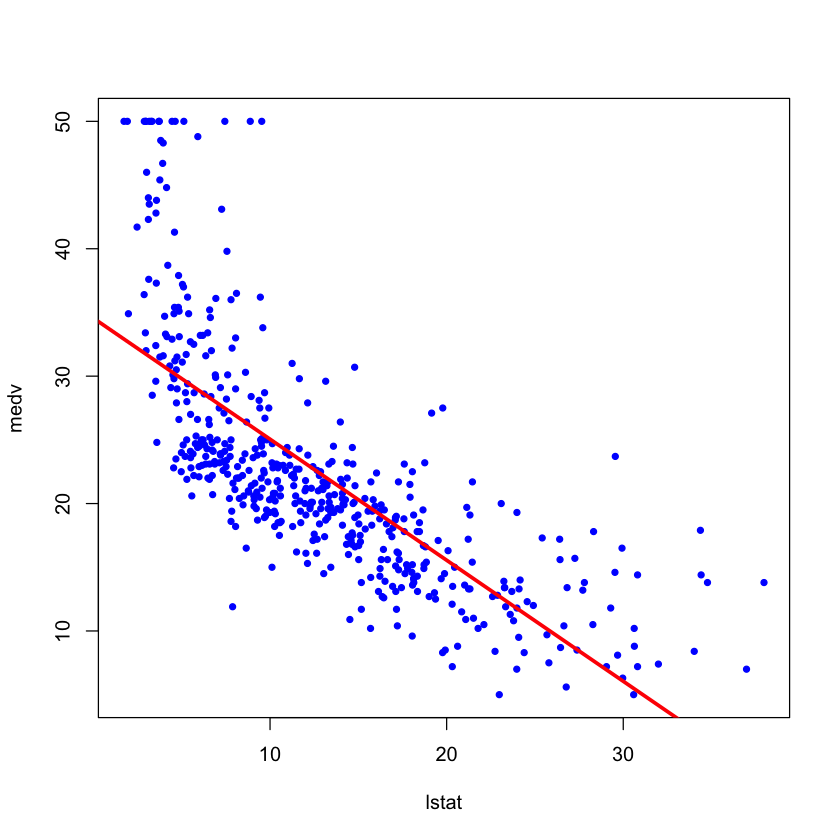

In [35]:
plot(lstat, medv, col="blue", pch=20)
abline(lm.fit, lwd=3, col="red")

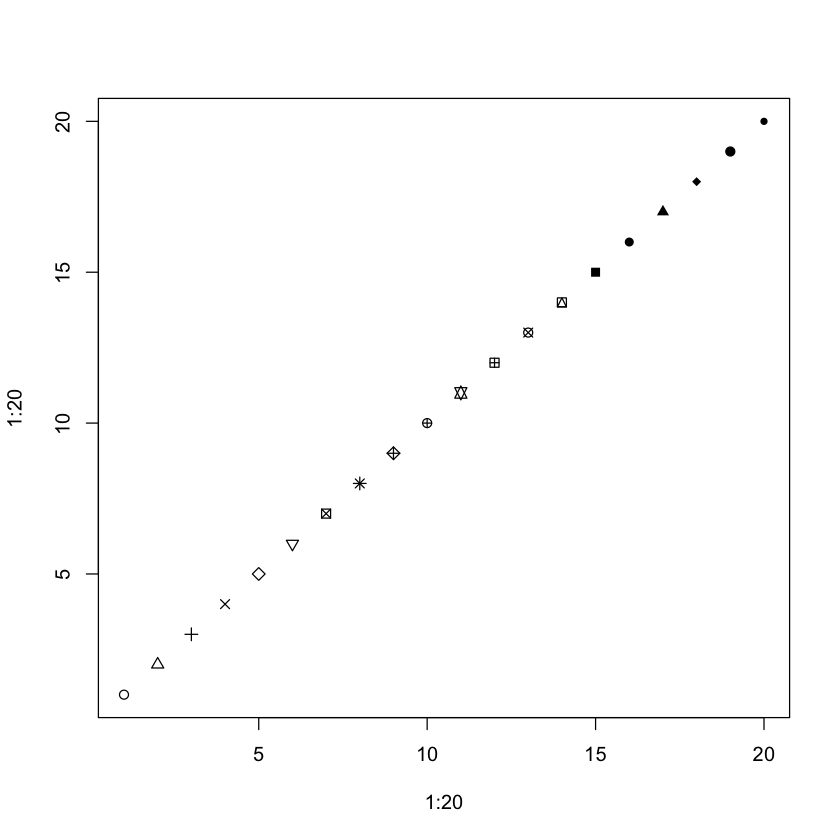

In [36]:
plot(1:20, 1:20, pch=1:20)

Next we examine some diagnostic plots. Four diagnostic plots are automatically produced by applying the `plot()` function directly to the output from `lm()`.  

This will generally produce one plot at a time and hitting _Enter_ will generate the next plot.

However, it is often convenient to view all four plots together. This can be achieved using the `par()` function, which tells R to split the display screen into separate panels so that multiple plots can be viewed simulataneously.

For example `par(mfrow=c(2,2))` divides the pltoting region into a 2 x 2 grid of panels

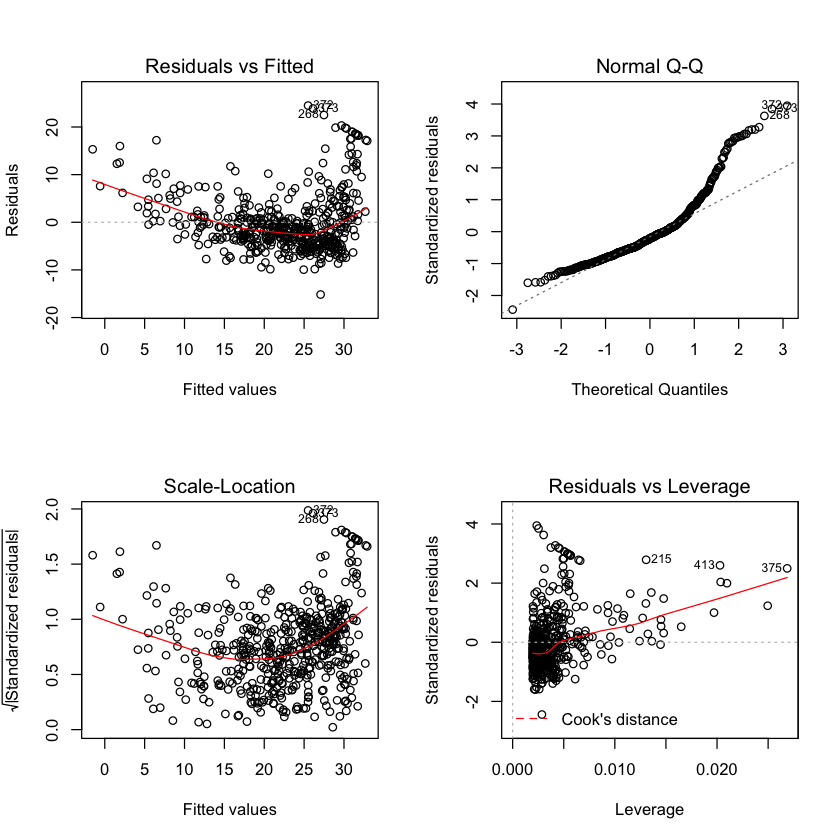

In [39]:
par(mfrow=c(2,2))
plot(lm.fit)

Alternatively we can compute the residuals from a linear regression fit using the `residuals()` function. The function `rstudent()` will return the studentised residuals, and we can use this function to plot the residuals against the fitted values.

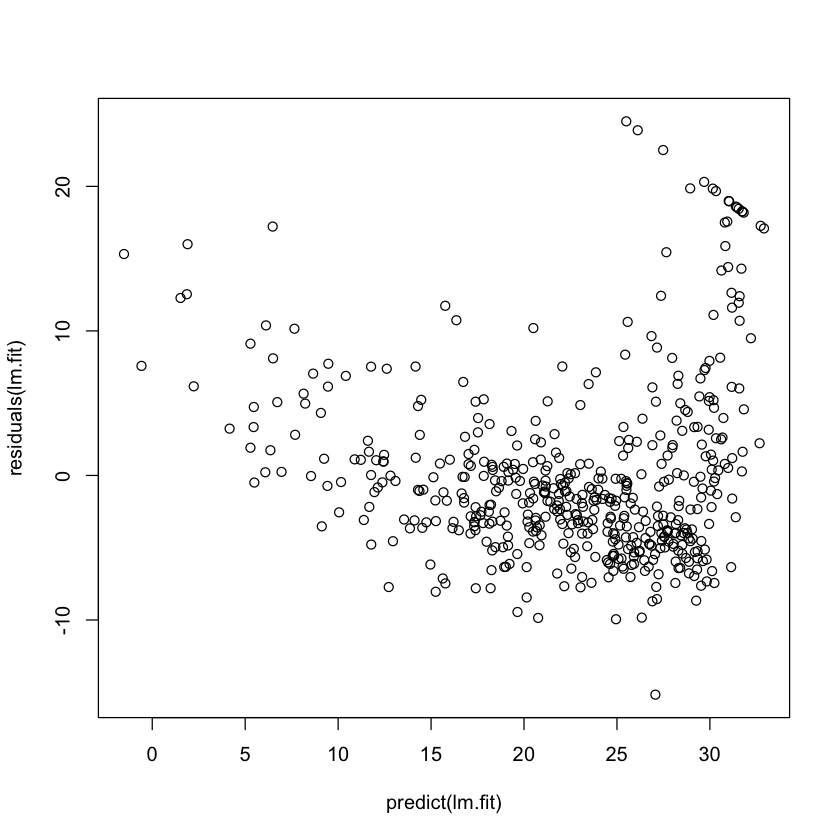

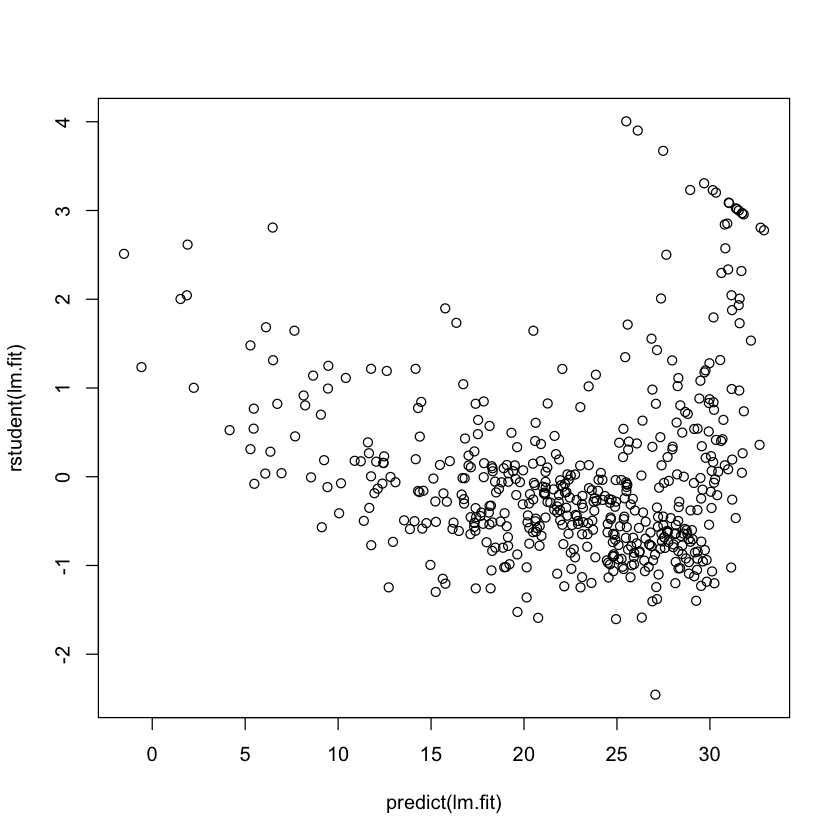

In [43]:
plot(predict(lm.fit), residuals(lm.fit))
plot(predict(lm.fit), rstudent(lm.fit))

On the basis of the residual plots, there is some evidence of non-linearity. Leverage statistics cna be computed for any number of predictors using the `hatvalues()` function.

375 
375

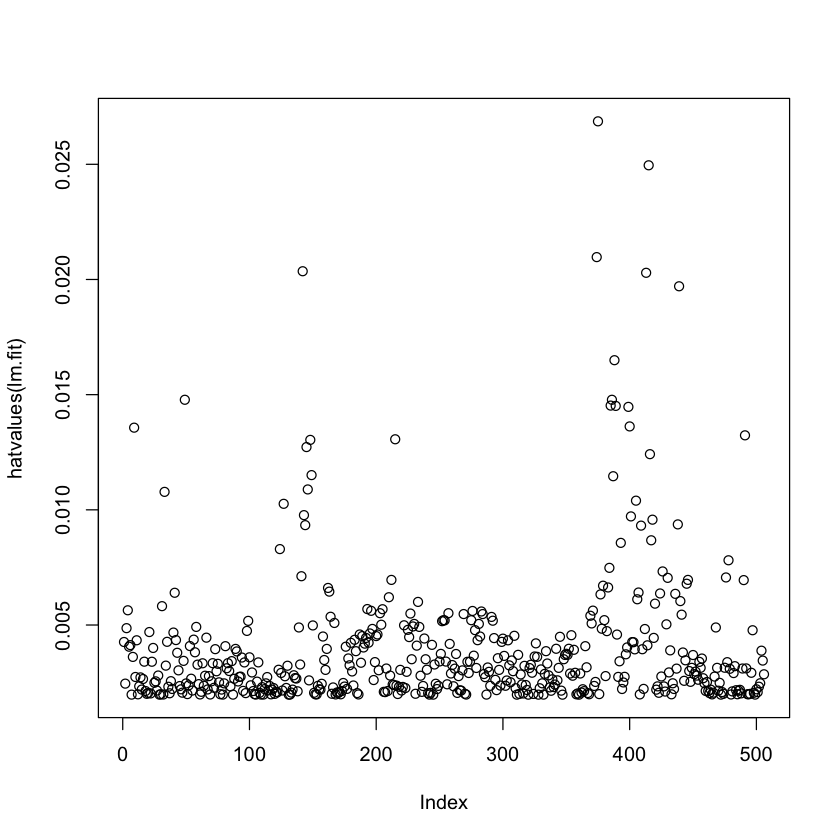

In [44]:
plot(hatvalues(lm.fit))
which.max(hatvalues(lm.fit))

The `which.max()` identifies the index of the largest element of a vector. In this case, it tells us which observation has the largest leverage statistic.